In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing 

### Random Dataset

In [1]:
dataset = ['data' + str(i) for i in range(1,101)]
dataset[:3]

['data1', 'data2', 'data3']

In [3]:
aku = ['aku' + str(i) for i in range(1,6)]
kamu = ['kamu' + str(i) for i in range(1,6)]
aku

['aku1', 'aku2', 'aku3', 'aku4', 'aku5']

In [8]:
dataPca = pd.DataFrame(columns= [*aku, *kamu], index = dataset)
dataPca.head()

,aku1,aku2,aku3,aku4,aku5,kamu1,kamu2,kamu3,kamu4,kamu5
data1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for data in dataPca.index: 
    dataPca.loc[data,'aku1':'aku5'] = np.random.poisson(lam=rd.randrange(500,1000), size=5)
    dataPca.loc[data,'kamu1':'kamu5'] = np.random.poisson(lam=rd.randrange(10,500), size=5)

In [14]:
dataPca.head()

,aku1,aku2,aku3,aku4,aku5,kamu1,kamu2,kamu3,kamu4,kamu5
data1,721,653,695,700,703,424,432,428,418,433
data2,1044,1007,964,995,926,392,412,403,349,325
data3,911,983,1047,1027,990,140,152,153,136,141
data4,989,1008,963,971,951,255,262,259,247,223
data5,541,531,535,526,546,55,52,48,47,44


In [15]:
dataPca.shape

(100, 10)

In [16]:
dataPca = dataPca.T
dataPca

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,...,data91,data92,data93,data94,data95,data96,data97,data98,data99,data100
aku1,721,1044,911,989,541,818,946,959,694,875,...,785,830,863,681,818,907,1002,700,735,726
aku2,653,1007,983,1008,531,833,850,909,688,838,...,762,830,830,654,827,850,961,728,711,713
aku3,695,964,1047,963,535,812,918,947,724,868,...,814,882,787,673,774,818,964,709,755,728
aku4,700,995,1027,971,526,851,938,935,723,859,...,803,852,786,711,756,858,942,715,768,686
aku5,703,926,990,951,546,768,866,891,719,872,...,814,845,830,685,764,819,1027,763,757,680
kamu1,424,392,140,255,55,131,205,174,243,363,...,380,239,269,181,192,318,81,333,387,377
kamu2,432,412,152,262,52,97,166,169,240,395,...,392,235,241,172,189,295,88,367,377,400
kamu3,428,403,153,259,48,94,170,167,255,381,...,407,255,268,200,175,348,86,326,376,406
kamu4,418,349,136,247,47,98,168,168,247,356,...,371,279,267,193,171,312,86,289,381,386
kamu5,433,325,141,223,44,105,194,144,256,367,...,368,231,239,160,194,288,78,338,385,388


### RUMUS

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [17]:
scaled_data = preprocessing.scale(dataPca)

In [18]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [19]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

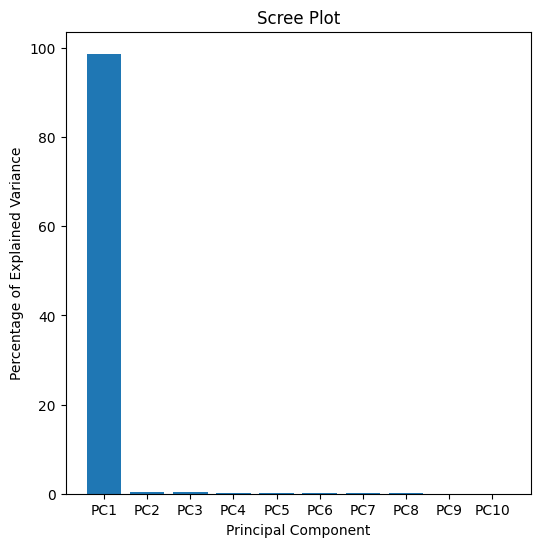

In [22]:
plt.figure(figsize=(6, 6))

plt.bar(x = range(1, len(per_var) + 1), height=per_var, tick_label = labels)

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')

plt.show()

In [23]:
np.round(pca.explained_variance_ratio_ * 100, decimals=1)

array([98.7,  0.4,  0.3,  0.2,  0.2,  0.1,  0.1,  0.1,  0. ,  0. ])

PCA1 = 98.7%

PCA2 = 98.7% + 0.4

etc

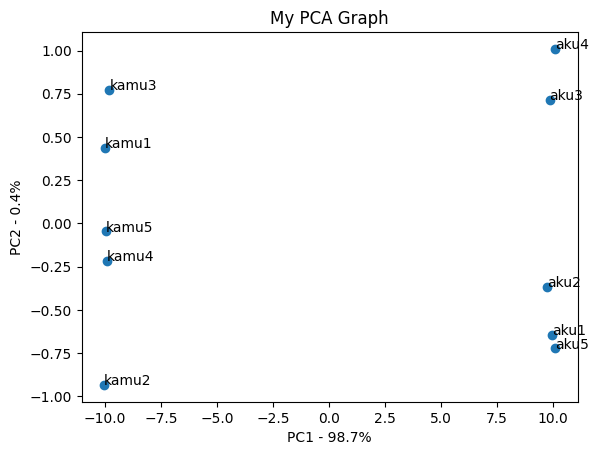

In [24]:
pca_df = pd.DataFrame(pca_data, index=[*aku, *kamu], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

### Determine which dataset had the biggest influence on PC1

In [25]:
loading_scores = pd.Series(pca.components_[0], index=dataset)
loading_scores

data1      0.099991
data2      0.099907
data3      0.100352
data4      0.100520
data5      0.100633
             ...   
data96     0.100170
data97     0.100553
data98     0.099936
data99     0.100397
data100    0.100097
Length: 100, dtype: float64

In [26]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

data53    0.100659
data86    0.100651
data5     0.100633
data62    0.100633
data40    0.100632
            ...   
data15    0.097543
data89    0.097334
data77    0.097153
data26    0.092800
data55    0.089702
Length: 100, dtype: float64

In [27]:
top_10_dataset = sorted_loading_scores[0:10].index.values

In [30]:
print(loading_scores[top_10_dataset])

data53    0.100659
data86    0.100651
data5     0.100633
data62    0.100633
data40    0.100632
data90    0.100608
data31    0.100604
data18    0.100594
data79    0.100591
data70    0.100587
dtype: float64
